In [21]:
import pandas as pd
import numpy as np
from matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt


df = pd.read_csv('/kaggle/input/lending-club-loan-data-imbalance-dataset/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.info()

In [ ]:
df.describe()

In [22]:
df.shape

(9578, 14)

In [23]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [24]:
# Check for missing values
df.isnull().sum()


credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [25]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['purpose'], drop_first=True)


In [26]:


# Features to standardize
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 
                       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 
                       'delinq.2yrs', 'pub.rec']

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


In [27]:

# Define features and target
X = df_encoded.drop('not.fully.paid', axis=1)
y = df_encoded['not.fully.paid']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
# Initialize and train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.73
ROC-AUC: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874

Confusion Matrix:
[[2016  392]
 [ 370   96]]


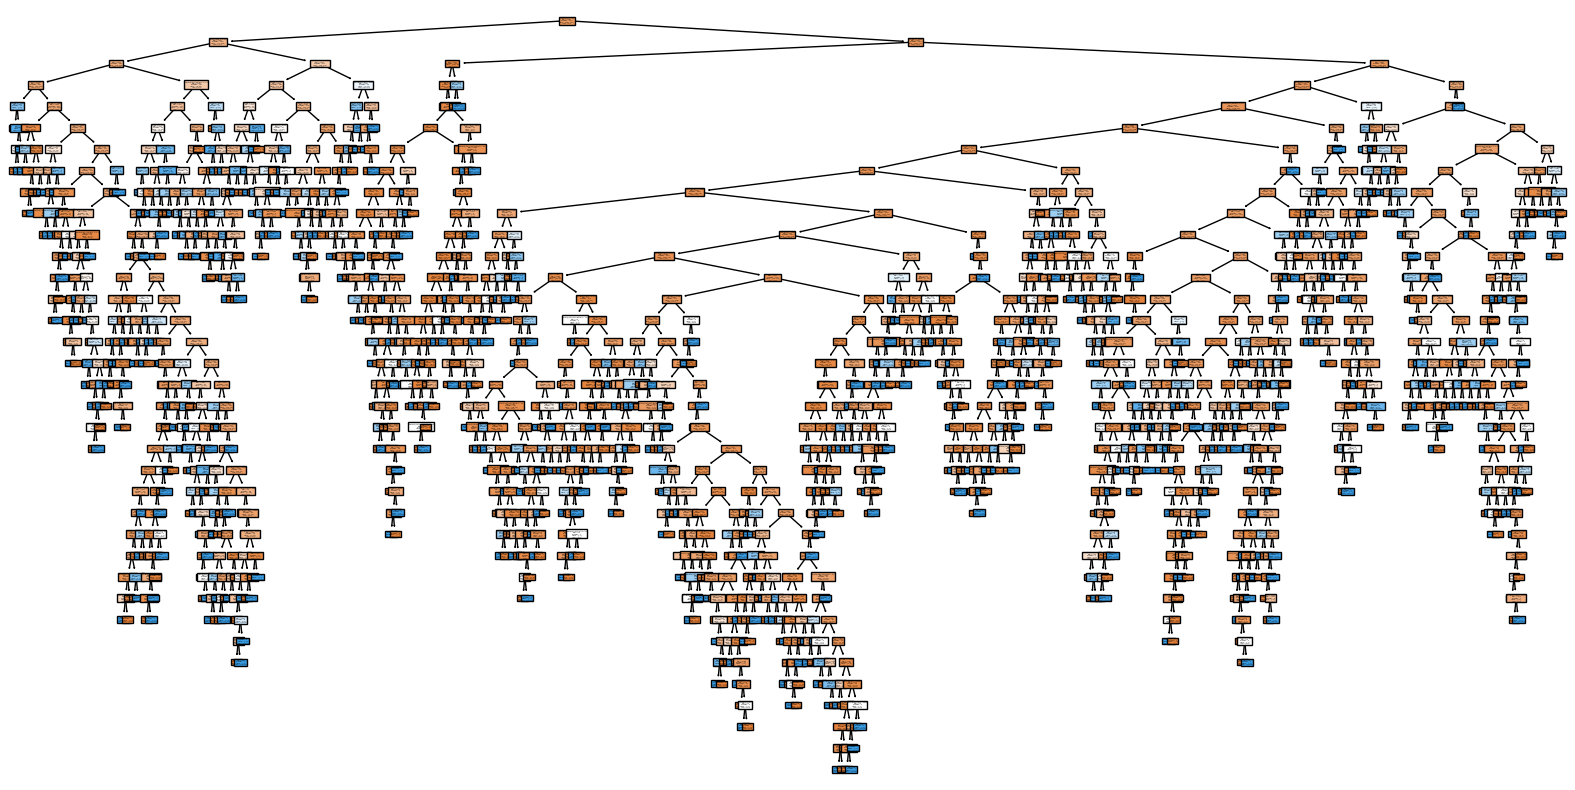

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Paid', 'Not Paid'])
plt.show()
